In [ ]:
# SET UP Fastai
%pip install -Uqq fastbook
%pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import csv
import cv2
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
img_path = "SeveranceA_Thumbnails/"
# XML sin preprocesar
df_original = pd.read_excel('SeveranceA.xls')
# .csv procesado
#filas = get_thumbnails(df_original, img_path)
#train = pd.DataFrame(filas, columns=df_original.columns)
display(df_original)

,lesion,edad,sexo,label_res,label_long,area_det,area
0,actinickeratosis,60,M,R/O AK\nR/O SCC,actinickeratosis;squamouscellcarcinoma;,Lt. cheek,Head&Neck
1,actinickeratosis,68,F,R/O AK,actinickeratosis;,perioral area,Head&Neck
2,actinickeratosis,39,F,R/O AK\nR/O SK,actinickeratosis;seborrheickeratosis;,nose,Head&Neck
3,actinickeratosis,63,F,R/O AK,actinickeratosis;,cheek,Head&Neck
4,actinickeratosis,66,F,R/O SK\nR/O AK,seborrheickeratosis;actinickeratosis;,nose,Head&Neck
...,...,...,...,...,...,...,...
10421,spitznevus,18,F,R/O inflammed intradermal nevus,melanocyticnevus;,cheek,Head&Neck
10422,spitznevus,13,F,R/O GP,pyogenicgranuloma;,Lt. calf,Leg
10423,spitznevus,14,F,R/O spitz nevus,otherbenign;,lower leg,Leg
10424,spitznevus,8,M,R/O hemangioma,hemangioma;,Rt. thigh,Leg


In [3]:
# Extraemos el conteo de cada clase
LABELS = df_original['lesion'].unique()

In [4]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ejemplo de DataFrame con una columna 'Causa' que contiene categorías

# Inicializa el LabelEncoder
label_encoder = LabelEncoder()

# Transforma las categorías en valores numéricos
df_original['lesion_numerica'] = label_encoder.fit_transform(df_original['lesion'])

# Muestra el resultado
print(df_original.iloc[4533])

lesion                                        hemangioma
edad                                                  85
sexo                                                   M
label_res          R/O hemorrhagic bulla\nR/O malignancy
label_long                  otherbenign;othermalignancy;
area_det                                      lower back
area                                               Trunk
lesion_numerica                                       14
Name: 4533, dtype: object


In [11]:
#train_y = df_original['lesion_numerica'].to_numpy()


# Representamos en un gráfico de barras
train_y = df_original.iloc[:,-1].to_numpy()

print(len(train_y))
print(train_y)


# Representamos en un gráfico de barras
sns.barplot(x=LABELS, y=np.sum(train_y, axis=0), hue = LABELS,dodge=False)
plt.title("Distribución del conjunto de entrenamiento")
plt.show()

10426
[ 0  0  0 ... 37 37 37]


AttributeError: 'bool' object has no attribute 'all'

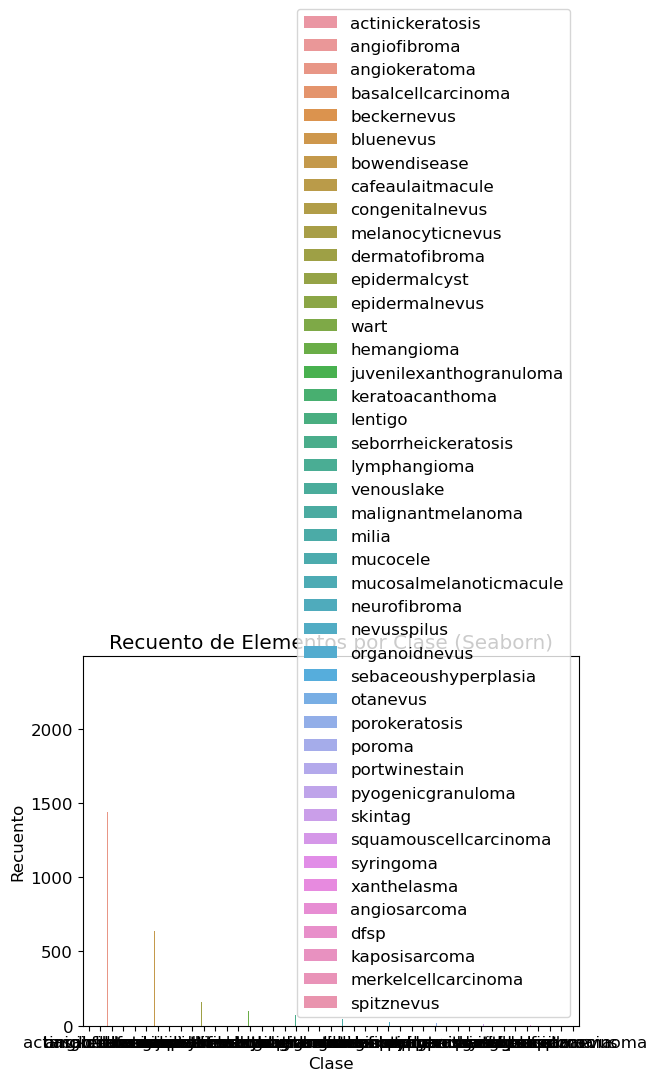

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Ejemplo de DataFrame con una columna 'Clase' que contiene categorías

# Calcula el recuento de cada clase
class_counts = df_original['lesion_numerica'].value_counts()

# Crea el gráfico de barras utilizando Seaborn
sns.barplot(x=LABELS, y=class_counts.values,hue = LABELS,dodge=False)
plt.xlabel('Clase')
plt.ylabel('Recuento')
plt.title('Recuento de Elementos por Clase (Seaborn)')
plt.show()

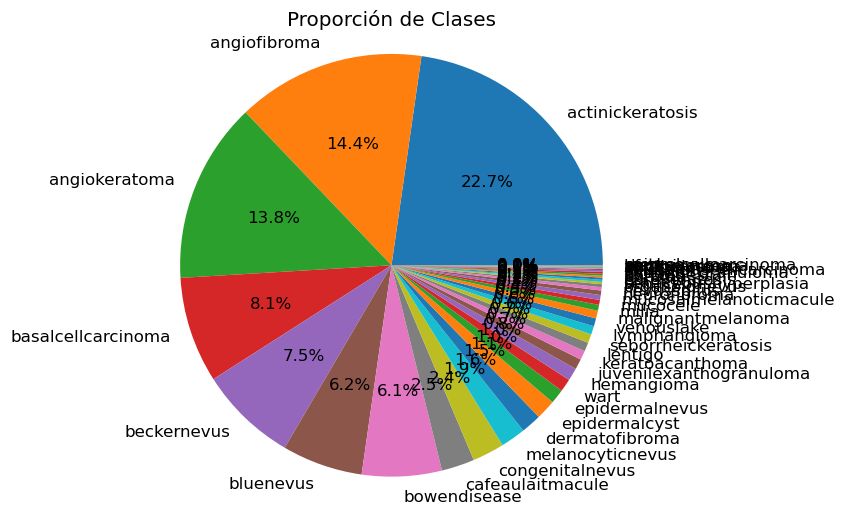

In [18]:
plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico
plt.pie(class_counts, labels=LABELS, autopct='%1.1f%%')
plt.title('Proporción de Clases')
plt.axis('equal')  # Para que el círculo sea igual
plt.show()